# Setting things up

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15150, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 15150 (delta 37), reused 61 (delta 31), pack-reused 15073
Receiving objects: 100% (15150/15150), 13.50 MiB | 16.58 MiB/s, done.
Resolving deltas: 100% (10283/10283), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
# define helper functions to show images on Colab
def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

# Upload data for training and validating

In [ ]:
# this is where my datasets are stored within my Google Drive
%cd /content/darknet
!ls /content/drive/MyDrive/yolov4_training

/content/darknet
backup		   obj.data   test.zip
generate_test.py   obj.names  yolov4-last.weights
generate_train.py  obj.zip    yolov4-obj.cfg


In [ ]:
# copy over both datasets into the root directory of the Colab VM
!cp /content/drive/MyDrive/yolov4_training/obj.zip ../
!cp /content/drive/MyDrive/yolov4_training/test.zip ../

In [ ]:
# unzip the datasets and their contents into /darknet/data/ folder
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

# Configure files for training

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /content/drive/MyDrive/yolov4_training/yolov4-obj.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/drive/MyDrive/yolov4_training/obj.names ./data
!cp /content/drive/MyDrive/yolov4_training/obj.data  ./data

Generating train.txt and test.txt which contain relative path to training and validating images

In [ ]:
# upload the generate_train.py and generate_test.py script to cloud VM
!cp /content/drive/MyDrive/yolov4_training/generate_train.py ./
!cp /content/drive/MyDrive/yolov4_training/generate_test.py ./

In [ ]:
!python generate_train.py
!python generate_test.py

In [ ]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


In [ ]:
# Download pre-trained weights
# Uncomment this command if you train model from the beginning
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

# Transfer current training weights to darknet folder
# Comment this command if you train model with half-way trained weights
!cp /content/drive/MyDrive/yolov4_training/backup/yolov4-obj_last.weights ./

# Train custom object detector!
Train custom object detector with following command:
```
!./darknet detector train <path to obj.data> <path to custom config> <path to starting weights> -dont_show -map
```
**TIPS:** This training could take several hours. However, Colab Cloud can stop if you are idle for too long. Paste the following code into console window and hit **Enter**. It will automatically click your screen once per 10 minutes.
```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```



In [ ]:
# train your custom detector! 
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4-obj_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.812549), count: 9, class_loss = 4.433074, iou_loss = 66.985703, total_loss = 71.418777 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.792219), count: 7, class_loss = 0.553260, iou_loss = 3.019439, total_loss = 3.572699 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.876217), count: 5, class_loss = 0.093019, iou_loss = 0.646613, total_loss = 0.739632 
 total_bbox = 449068, rewritten_bbox = 0.886280 % 

 (next mAP calculation at 6762 iterations) 

 Tensor Cores are used.
 Last accuracy mAP@0.5 = 71.55 %, best = 71.55 % 
 6527: 2.653554, 2.967069 avg loss, 0.001000 rate, 6.030559 seconds, 417728 images, 6.267429 hours left
Loaded: 0.000048 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.772573), count: 3, class_loss = 1.620008, iou_loss = 5.49

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

## Testing phase

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=32/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
# Check mAP of trained model
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /content/drive/MyDrive/yolov4_training/backup/yolov4-obj_final.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

The object detector can be run using the following command
```
!./darknet detector test <path to .data file> <path to config> <path to weights> <path to image>
```
After running detection, OpenCV cannot open the image in the cloud so we must run 
```
imShow('predictions.jpg')
```


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

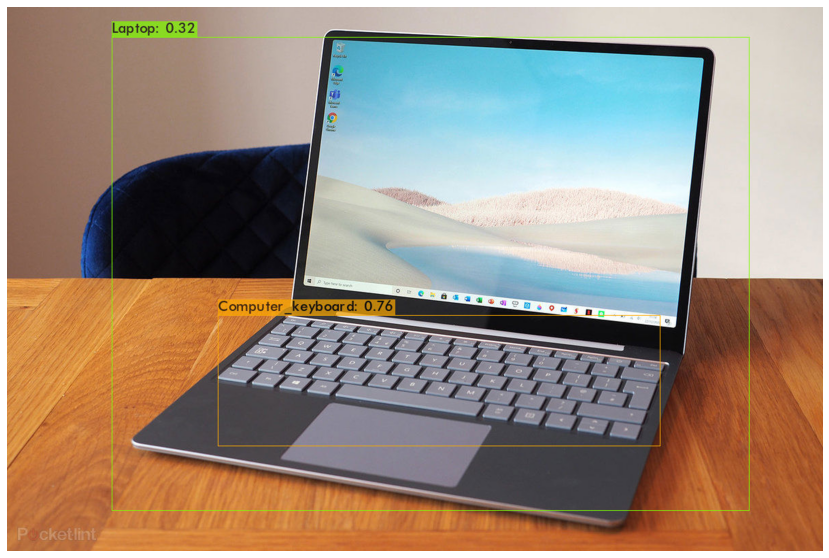

In [ ]:
# run your custom detector with this command 
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /content/drive/MyDrive/yolov4_training/backup/yolov4-obj_final.weights /content/drive/MyDrive/Colab_data/laptop.jpg
imShow('predictions.jpg')